In [0]:
import pandas as pd
import numpy as np
import os, time, pickle
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import datetime as dt


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('mode.chained_assignment', None)

In [741]:
print('Hello!')

Hello!


## To open files
They can be uploaded with the code below

In [0]:
from google.colab import files
uploaded = files.upload()

Saving Switch05_Data.xlsx to Switch05_Data.xlsx


### Basic dataframes

In [0]:
f = 'Switch01_Data.xlsx'
df = pd.read_excel(f)

In [0]:
#Noms de les columnes
df.columns

Index([    'Sturing Stand',                6338,        'Unnamed: 2',
          'Controle Stand',               12886,        'Unnamed: 5',
       'MotorstroomActief',               12897,        'Unnamed: 8',
        'Sectie Berijding',               13578],
      dtype='object')

Data Loader for all Switches (must be all 5 loaded and it will return a list of df)

In [0]:
for i,file in t(enumerate(f[:2])): #For all the Switches
  for filesheet in fsheet: #For each sheet in excel
    #Read the correct data for each sheet
    if filesheet == 'Meetdata':
      #Read data for the da
      Sw_Excel = pd.read_excel(file,sheet_name=filesheet)
    
      #Clean the empty Columns (NaN)
      Sw_Excel = Sw_Excel.dropna(axis = 'columns', how = 'all')
    
      #Extracting all the information and cleaning the NaN
      C_ControlLeft = Sw_Excel.iloc[:,:2].dropna(axis = 'index', how = 'all')
      C_ControlRight = Sw_Excel.iloc[:,2:4].dropna(axis = 'index', how = 'all')
      C_SteeringRight = Sw_Excel.iloc[:,4:6].dropna(axis = 'index', how = 'all')
      C_SteeringLeft = Sw_Excel.iloc[:,6:8].dropna(axis = 'index', how = 'all')
      C_MotorCurrent = Sw_Excel.iloc[:,8:10].dropna(axis = 'index', how = 'all')

    

    elif filesheet == 'Bouwstenen':
      #Read data for the da
      Sw_Excel = pd.read_excel(file,sheet_name=filesheet)
    
      #Clean the empty Columns (NaN)
      Sw_Excel = Sw_Excel.dropna(axis = 'columns', how = 'all')
      
      #Extracting all the information and cleaning the NaN
      C_ControlPosition = Sw_Excel.iloc[:,:2].dropna(axis = 'index', how = 'all')
      C_SteeringCommand = Sw_Excel.iloc[:,2:4].dropna(axis = 'index', how = 'all')
      C_MotorCurrentActive = Sw_Excel.iloc[:,4:6].dropna(axis = 'index', how = 'all')
    
      
    elif filesheet == 'Samenvattende Waarde':
      #Read data for the da
      Sw_Excel = pd.read_excel(file,sheet_name=filesheet)
    
      #Clean the empty Columns (NaN)
      Sw_Excel = Sw_Excel.dropna(axis = 'columns', how = 'all')
      
      #Extracting all the information and cleaning the NaN
      C_EnergySurfaceLeft = Sw_Excel.iloc[:,:2].dropna(axis = 'index', how = 'all')
      C_EnergySurfaceRight = Sw_Excel.iloc[:,2:4].dropna(axis = 'index', how = 'all')
      C_StartPeakLeft = Sw_Excel.iloc[:,4:6].dropna(axis = 'index', how = 'all')
      C_StartPeakRight = Sw_Excel.iloc[:,6:8].dropna(axis = 'index', how = 'all')
      C_MaxTransitionLeft = Sw_Excel.iloc[:,8:10].dropna(axis = 'index', how = 'all')
      C_MaxTransitionRight = Sw_Excel.iloc[:,10:12].dropna(axis = 'index', how = 'all')
      C_MotorTransitionTimeLeft = Sw_Excel.iloc[:,12:14].dropna(axis = 'index', how = 'all')
      C_MotorTransitionTimeRight = Sw_Excel.iloc[:,14:16].dropna(axis = 'index', how = 'all')
      C_RelayTransitionTimeRight = Sw_Excel.iloc[:,16:18].dropna(axis = 'index', how = 'all')
      C_RelayTransitionTimeLeft = Sw_Excel.iloc[:,18:20].dropna(axis = 'index', how = 'all')
      C_TimeEndMotorCurrentControlLeft = Sw_Excel.iloc[:,20:22].dropna(axis = 'index', how = 'all')
      C_TimeEndMotorCurrentControlRight = Sw_Excel.iloc[:,22:24].dropna(axis = 'index', how = 'all')
      C_TimeSteeringMotorCurrentLeft = Sw_Excel.iloc[:,24:26].dropna(axis = 'index', how = 'all')
      C_TimeSteeringMotorCurrentRight = Sw_Excel.iloc[:,26:28].dropna(axis = 'index', how = 'all')
      C_ControlOutTime = Sw_Excel.iloc[:,28:30].dropna(axis = 'index', how = 'all')
      C_SectionOcupationTime = Sw_Excel.iloc[:,30:32].dropna(axis = 'index', how = 'all')
    
    #Creation of the final df
  frames = [C_ControlPosition, C_SteeringCommand, C_MotorCurrentActive, C_ControlLeft, C_ControlRight, C_SteeringRight, C_SteeringLeft, C_MotorCurrent, C_EnergySurfaceLeft, C_EnergySurfaceRight, \
             C_StartPeakLeft, C_StartPeakRight, C_MaxTransitionLeft, C_MaxTransitionRight, C_MotorTransitionTimeLeft, C_MotorTransitionTimeRight, C_RelayTransitionTimeRight, C_RelayTransitionTimeLeft, \
             C_TimeEndMotorCurrentControlLeft, C_TimeEndMotorCurrentControlRight, C_TimeSteeringMotorCurrentLeft, C_TimeSteeringMotorCurrentRight, C_ControlOutTime, C_SectionOcupationTime]
  
  Sw.append(pd.concat(frames, keys = [C_ControlPosition.columns[1], C_SteeringCommand.columns[1], C_MotorCurrentActive.columns[1], C_ControlLeft.columns[1], C_ControlRight.columns[1], C_SteeringRight.columns[1], \
                                    C_SteeringLeft.columns[1], C_MotorCurrent.columns[1], C_EnergySurfaceLeft.columns[1], C_EnergySurfaceRight.columns[1], C_StartPeakLeft.columns[1], C_StartPeakRight.columns[1], \
                                    C_MaxTransitionLeft.columns[1], C_MaxTransitionRight.columns[1], C_MotorTransitionTimeLeft.columns[1], C_MotorTransitionTimeRight.columns[1], C_RelayTransitionTimeRight.columns[1], \
                                    C_RelayTransitionTimeLeft.columns[1], C_TimeEndMotorCurrentControlLeft.columns[1], C_TimeEndMotorCurrentControlRight.columns[1], C_TimeSteeringMotorCurrentLeft.columns[1], \
                                    C_TimeSteeringMotorCurrentRight.columns[1], C_ControlOutTime.columns[1], C_SectionOcupationTime.columns[1]], sort=False))

### Read and modify dataframes

In [0]:
Sw = [0,0,0,0,0]
filename = ['Switch01_Data.xlsx', 'Switch02_Data.xlsx','Switch03_Data.xlsx', 'Switch04_Data.xlsx', 'Switch05_Data.xlsx']

for i in range(5):
  df0 = pd.read_excel(filename[i],sheet_name = 0)
  df1 = pd.read_excel(filename[i],sheet_name = 1)
  df2 = pd.read_excel(filename[i],sheet_name = 2)
  df = pd.concat([df0,df1,df2],axis=1).dropna(axis="columns",how = "all")
  #df.count()
  Sw[i] = df

In [0]:
#This cell is used to partition the dataset into a list of control events for each switch,
#the partition is saved in newdf.

numerolleig = 2 #Nombre d'esdeveniments de control de més als que s'accedeix en retallar les dades
midamax = 20000
newdf = [midamax*[0] for i in range(5)]

def get_event_info(swNum,tindex):
  if type(newdf[swNum][tindex]) == int:
    
    newdf2 = []
    aux1 = Sw[swNum]
    aux4 = aux1.iloc[:,0].dropna(axis="index",how="all")
    count_row = aux4.shape[0]
    count_col = aux1.shape[1]

    temps = tindex
    t = aux1['SteeringCommandDate'][temps]
    tnext = aux1['SteeringCommandDate'][temps+1+numerolleig]
    print(type(t),type(tnext))
    print(temps)
    for index in range(int(count_col/2)): #Itera columnes (dades)
      aux2 = aux1.iloc[:,index*2:index*2+2]
      #print(aux2)
      newdf2.append(aux2[(aux2.iloc[:,0]>= t)&(aux2.iloc[:,0]<=tnext)].reset_index(drop=True))

    #print(newdf2)
    newdf[swNum][tindex] = pd.concat(newdf2, axis=1)
  return newdf[swNum][tindex] 

In [585]:
#Example
event = get_event_info(1,155)
event['SteeringCommandDate'].dropna()

<class 'pandas._libs.tslibs.timestamps.Timestamp'> <class 'pandas._libs.tslibs.timestamps.Timestamp'>
155


0   2019-04-07 00:11:01.762
1   2019-04-07 01:34:55.782
2   2019-04-07 01:38:01.282
Name: SteeringCommandDate, dtype: datetime64[ns]

### Plot dataframe

In [0]:
#This cell allows to directly plot dataframes or the newdataframe split by control events

BouwstenenVariableNames = ['ControlPosition', 'SteeringCommand',
                           'MotorCurrentActive']
ctt = -5

def convertToNumber(dataframe, variableName):
  resultdf = dataframe[variableName]
  
  if (variableName == 'ControlPosition'):
    resultdf.loc[dataframe[variableName] == "Links in controle"] = -1+ctt
    resultdf.loc[dataframe[variableName] == "Rechts in controle"] = 1+ctt
    resultdf.loc[dataframe[variableName] == "Uit controle"] = 0+ctt
    
  if (variableName == 'SteeringCommand'):
    resultdf.loc[dataframe[variableName] == "Sturing Links"] = -1+ctt
    resultdf.loc[dataframe[variableName] == "Sturing Rechts"] = 1+ctt
    resultdf.loc[dataframe[variableName] == "Sturing Onbekend"] = 0+ctt
    
  if (variableName == 'MotorCurrentActive'):
    resultdf.loc[dataframe[variableName] == "Motorstroom Actief"] = 1+ctt
    resultdf.loc[dataframe[variableName] == "Geen Motorstroom"] = 0+ctt
    
def plotColumn(dataframe, variableName, ax):
  timeName = variableName + 'Date'

  if (variableName in BouwstenenVariableNames):
    convertToNumber(dataframe, variableName)

  
  dataframe.plot(drawstyle='steps-post',x=timeName,y=variableName, ax=ax)
  
def plotDataframeColumns(dataframe, variableNames):
  df = dataframe.copy()
  ax = plt.gca()
  for variableName in variableNames:
    timeName = variableName + 'Date'
    plotColumn(df, variableName, ax)
    
  plt.xlabel('Time')
  
def plotEventColumns(dataframe, variableNames, passedtime=0.0001, timeshift=0):
  df = dataframe.copy()
  ax = plt.gca()
  shift = 0
  f = (dataframe['SteeringCommandDate'][1] - dataframe['SteeringCommandDate'][0])
  f2 = (dataframe['SteeringCommandDate'][2] - dataframe['SteeringCommandDate'][1])
  total = f + f2
  p1 = f/total
  p2 = f2/total
  print(dataframe['SteeringCommandDate'][0])
  print(dataframe['SteeringCommandDate'][1])
  print(dataframe['SteeringCommandDate'][2])
  for variableName in variableNames:
    plotColumn(df, variableName, ax)
  xmin, xmax, ymin, ymax = plt.axis()
  print(xmin, xmax, ymin, ymax)
  shift = p1*(xmax-xmin)-0.00004
  ax.set_xlim(xmax = min(xmin+passedtime+shift,xmax+shift), xmin = xmin+shift)
  xmin, xmax, ymin, ymax = plt.axis()
  print(xmin, xmax, ymin, ymax)
  plt.xlabel('Time')
  
def plotEvent(swNum, eventNum, columnNames,passedtime=0.0001):
  event = get_event_info(swNum-1, eventNum-1)
  plotEventColumns(event,columnNames,passedtime=passedtime)

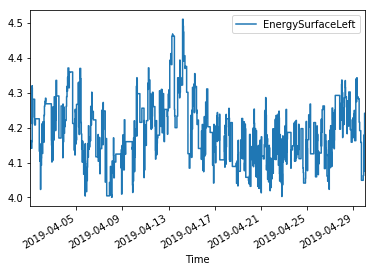

In [742]:
plotDataframeColumns(Sw[3],["EnergySurfaceLeft"])

2019-04-17 09:08:01.499000
2019-04-17 10:12:09.218000
2019-04-17 10:15:30.354000
737166.3805729051 737166.4274346528 -7.266293335 20.592160035
737166.4250666898 737166.4254666899 -7.266293335 20.592160035


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:3221: MatplotlibDeprecationWarning: 
The `xmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `right` instead.
  alternative='`right`', obj_type='argument')


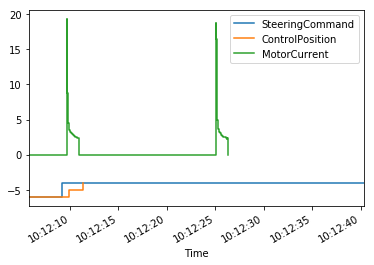

In [744]:
plotEvent(2,420,['SteeringCommand','ControlPosition','MotorCurrent'],passedtime=0.0004)

In [0]:
errors_motor2 = [188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 202,
       254, 255, 419, 420, 421]

## Exemple en què primer es dóna l'encesa del motor i després la comanda

In [583]:
event['SteeringCommandDate']

0     2019-04-01 18:56:22.793
1     2019-04-01 19:02:58.202
2     2019-04-01 19:21:10.410
3                         NaT
4                         NaT
5                         NaT
6                         NaT
7                         NaT
8                         NaT
9                         NaT
10                        NaT
11                        NaT
12                        NaT
13                        NaT
14                        NaT
15                        NaT
16                        NaT
17                        NaT
18                        NaT
19                        NaT
20                        NaT
21                        NaT
22                        NaT
23                        NaT
24                        NaT
25                        NaT
26                        NaT
27                        NaT
28                        NaT
29                        NaT
                ...          
136                       NaT
137                       NaT
138       

In [578]:
event['MotorCurrentDate']

0     2019-04-01 18:56:22.795
1     2019-04-01 18:56:22.805
2     2019-04-01 18:56:22.815
3     2019-04-01 18:56:22.825
4     2019-04-01 18:56:22.835
5     2019-04-01 18:56:22.845
6     2019-04-01 18:56:22.855
7     2019-04-01 18:56:22.865
8     2019-04-01 18:56:22.875
9     2019-04-01 18:56:22.885
10    2019-04-01 18:56:22.895
11    2019-04-01 18:56:22.905
12    2019-04-01 18:56:22.915
13    2019-04-01 18:56:22.925
14    2019-04-01 18:56:22.935
15    2019-04-01 18:56:22.945
16    2019-04-01 18:56:22.955
17    2019-04-01 18:56:22.965
18    2019-04-01 18:56:22.975
19    2019-04-01 18:56:22.985
20    2019-04-01 18:56:22.995
21    2019-04-01 18:56:23.005
22    2019-04-01 18:56:23.025
23    2019-04-01 18:56:23.035
24    2019-04-01 18:56:23.055
25    2019-04-01 18:56:23.065
26    2019-04-01 18:56:23.085
27    2019-04-01 18:56:23.095
28    2019-04-01 18:56:23.165
29    2019-04-01 18:56:23.175
                ...          
136   2019-04-01 19:21:10.692
137   2019-04-01 19:21:10.712
138   2019

In [579]:
event=get_event_info(0,155)
event['MotorCurrentDate']

0     2019-04-01 18:34:45.338
1     2019-04-01 18:34:45.348
2     2019-04-01 18:34:45.358
3     2019-04-01 18:34:45.368
4     2019-04-01 18:34:45.378
5     2019-04-01 18:34:45.388
6     2019-04-01 18:34:45.398
7     2019-04-01 18:34:45.408
8     2019-04-01 18:34:45.418
9     2019-04-01 18:34:45.428
10    2019-04-01 18:34:45.438
11    2019-04-01 18:34:45.448
12    2019-04-01 18:34:45.458
13    2019-04-01 18:34:45.468
14    2019-04-01 18:34:45.478
15    2019-04-01 18:34:45.488
16    2019-04-01 18:34:45.498
17    2019-04-01 18:34:45.508
18    2019-04-01 18:34:45.518
19    2019-04-01 18:34:45.528
20    2019-04-01 18:34:45.538
21    2019-04-01 18:34:45.548
22    2019-04-01 18:34:45.558
23    2019-04-01 18:34:45.568
24    2019-04-01 18:34:45.578
25    2019-04-01 18:34:45.588
26    2019-04-01 18:34:45.598
27    2019-04-01 18:34:45.608
28    2019-04-01 18:34:45.618
29    2019-04-01 18:34:45.638
                ...          
136   2019-04-01 18:49:03.556
137   2019-04-01 18:49:03.566
138   2019

## Correlation between temperature and Energy


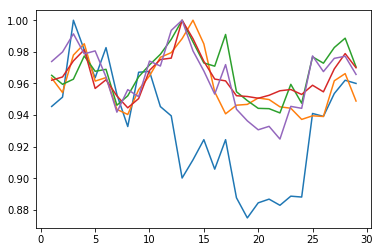

In [743]:
for i in range(5):
  TempsEnergia = Sw[i][{'EnergySurfaceLeftDate','EnergySurfaceLeft'}].dropna()
  v = TempsEnergia.groupby(TempsEnergia.EnergySurfaceLeftDate.dt.day).EnergySurfaceLeft.mean()
  plt.plot(v/max(v))

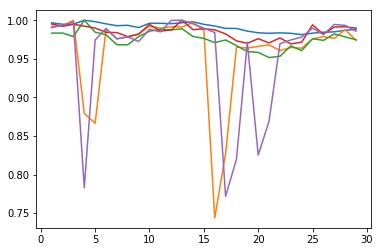

In [739]:
for i in range(5):
  TempsEnergia = Sw[i][{'StartPeakLeftDate','StartPeakLeft'}].dropna()
  v = TempsEnergia.groupby(TempsEnergia.StartPeakLeftDate.dt.day).StartPeakLeft.mean()
  plt.plot(v/max(v))

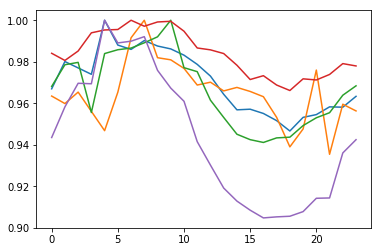

In [738]:
for i in range(5):
  TempsEnergia = Sw[i][{'EnergySurfaceLeftDate','EnergySurfaceLeft'}].dropna()
  v = TempsEnergia.groupby(TempsEnergia.EnergySurfaceLeftDate.dt.hour).EnergySurfaceLeft.mean()
  plt.plot(v/max(v))